# Packages

In [17]:
import xarray as xr
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Functions and constants

# Read data

In [18]:
# Load the NetCDF file for all days
all_days_ds = xr.open_dataset('cape_all_days.nc')
cape_all_days = all_days_ds['cape'].values.flatten()
cape_all_days = cape_all_days[~np.isnan(cape_all_days)]  # Remove NaNs efficiently

# Load extreme CAPE values from CSV 
extreme_csv_path = 'cape_extreme_days.csv'
try:
    extreme_df = pd.read_csv(extreme_csv_path)
    cape_extreme_days = extreme_df['cape'].dropna().values  # Ensure no NaNs
except FileNotFoundError:
    print(f"Warning: {extreme_csv_path} not found. Proceeding with empty extreme days data.")
    cape_extreme_days = np.array([])  # Handle missing file case

# Analysis

In [19]:
# Compute mean CAPE values
mean_all_days = np.mean(cape_all_days) if cape_all_days.size else np.nan
mean_extreme_days = np.mean(cape_extreme_days) if cape_extreme_days.size else np.nan

# Plots

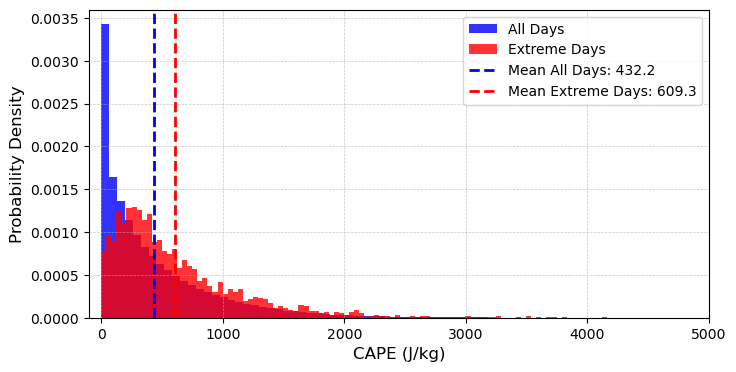

In [20]:
# Create the histogram
plt.figure(figsize=(8, 4))  # Set figure size

# Histogram for all days (blue)
plt.hist(
    cape_all_days, bins=100, density=True, alpha=0.8, color='blue', label='All Days'
)

# Histogram for extreme precipitation days (red)
plt.hist(
    cape_extreme_days, bins=100, density=True, alpha=0.8, color='red', label='Extreme Days'
)

# Plot vertical lines for the means
plt.axvline(mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {mean_all_days:.1f}')
plt.axvline(mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {mean_extreme_days:.1f}')

# Labels and title
plt.xlabel('CAPE (J/kg)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.xlim(-100, 5000)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # Add grid
plt.legend()  # Add legend

# Show plot
plt.show()